In [4]:
# download nba shot data from kaggle
import kagglehub

path = kagglehub.dataset_download("techbaron13/nba-shots-dataset-2001-present")
print("Path to dataset files:", path)

Path to dataset files: /Users/farhany1030/.cache/kagglehub/datasets/techbaron13/nba-shots-dataset-2001-present/versions/2


In [ ]:
# get data from all csv files and put together in a single dataframe 
# had to do separate loops for 2020 and 2021 as those seasons don't follow conventional NBA season (covid years)
import pandas as pd

# path to all files on my computer
path = "/Users/farhany1030/.cache/kagglehub/datasets/techbaron13/nba-shots-dataset-2001-present/versions/2/nba/"

# months NBA season takes place (except in 2020 and 21 where season was shortened due to covid (adjustments were made already))
nba_months = ['10', '11', '12', '01', '02', '03', '04', '05', '06']

# empty dataframe to hold the data
nba_shot_data = pd.DataFrame()

# years the data is from 
for year in range(2000, 2023):
    for month in nba_months:
        for day in range(1, 32):
            # need to add a 0 in front of day to fit with the file titles
            if day < 10:
                day = '0' + str(day)
            file = path + str(year) + str(month) + str(day) + '.csv' # complete file path

            # since we don't know the exact days that nba games took place, we try for each day of every month 
            # and catch the error if the file doesn't exist and continue to the next day
            try:
                # if file is found, we read the data and then concat it to our major dataframe 
                nba_data = pd.read_csv(file)
                nba_shot_data = pd.concat([nba_shot_data, nba_data])
            except FileNotFoundError:
                continue
    print("Done with", year)

In [ ]:
# perform some data cleaning and save files for future use

# boolean to show which team is home team
nba_shot_data['home_team'] = nba_shot_data['team'] == nba_shot_data['match_id'].astype(str).str[-3:]

# replaces string for shot types with integer
nba_shot_data = nba_shot_data.replace({'2-pointer' : 2, '3-pointer' : 3})

# gets the year the shot took place from match_id
nba_shot_data['year'] = nba_shot_data['match_id'].astype(str).str[0:4]

# gets the month the shot took place from match_id
nba_shot_data['month'] = nba_shot_data['match_id'].astype(str).str[4:6]

# getting the specific NBA season shot took place
seasons = ['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10',
            '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20',
            '2020-21', '2021-22']
for season in seasons:
    year1 = season[0:4]
    year2 = '20' + season[-2:]
    mask1 = (nba_shot_data['year'] == year1) & (nba_shot_data['month'].astype(int) > 9)
    mask2 = (nba_shot_data['year'] == year2) & (nba_shot_data['month'].astype(int) < 7)
    nba_shot_data.loc[mask1 | mask2, 'season'] = season

# changing team from initials to actual name (some teams have multiple initials and some teams no longer exist)
initials_to_name = {
    'CHH' : 'Charlotte Hornets',
    'ATL' : 'Atlanta Hawks',
    'SAC' : 'Sacramento Kings',
    'CHI' : 'Chicago Bulls',
    'MIL' : 'Milwaukee Bucks',
    'DAL' : 'Dallas Mavericks',
    'PHO' : 'Phoenix Suns',
    'GSW' : 'Golden State Warriors',
    'MIN' : 'Minnesota Timberwolves',
    'HOU' : 'Houston Rockets',
    'CLE' : 'Cleveland Cavaliers',
    'NJN' : 'New Jersey Nets',
    'PHI' : 'Philadelphia 76ers',
    'NYK' : 'New York Knicks',
    'WAS' : 'Washington Wizards',
    'ORL' : 'Orlando Magic',
    'LAL' : 'Los Angeles Lakers',
    'POR' : 'Portland Trailblazers',
    'IND' : 'Indiana Pacers',
    'SAS' : 'San Antonio Spurs',
    'DET' : 'Detroit Pistons',
    'LAC' : 'Los Angeles Clippers',
    'UTA' : 'Utah Jazz',
    'SEA' : 'Seattle Supersonics',
    'VAN' : 'Vancouver Grizzlies',
    'BOS' : 'Boston Celtics',
    'MIA' : 'Miami Heat',
    'DEN' : 'Denver Nuggets',
    'MEM' : 'Memphis Grizzlies',
    'NOH' : 'New Orleans Pelicans',
    'CHA' : 'Charlotte Hornets',
    'NOK' : 'New Orleans Pelicans',
    'OKC' : 'Oklahoma City Thunder',
    'BRK' : 'Brooklyn Nets',
    'NOP' : 'New Orleans Pelicans',
    'CHO' : 'Charlotte Hornets',
    'TOR' : 'Toronto Raptors'
}
nba_shot_data = nba_shot_data.replace(initials_to_name)

# nba_shot_data.to_csv("shot_data_2000_2022.csv") # save this data for future use

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Circle, Rectangle
import matplotlib.cm as cm
import seaborn as sns

# Taken from a youtube video but understand what's happening
def draw_nba_court(axis=None):
    if axis is None:
        fig = plt.figure(figsize=(9, 9))
        axis = fig.add_subplot(111, aspect='auto')
    else:
        fig = None

    # --- Court Outline (Baseline, Sidelines, Halfcourt Line) ---
    axis.plot([-250, 250], [-47.5, -47.5], 'k-')     # Baseline
    axis.plot([-250, -250], [-47.5, 422.5], 'k-')    # Left sideline
    axis.plot([250, 250], [-47.5, 422.5], 'k-')      # Right sideline
    axis.plot([-250, 250], [422.5, 422.5], 'k-')     # Halfcourt line

    # --- Backboard ---
    axis.plot([-30, 30], [-10, -10], 'k-', lw=2)

    # --- Paint / Lane ---
    axis.plot([-80, -80], [-47.5, 142.5], 'k-')
    axis.plot([80, 80], [-47.5, 142.5], 'k-')
    axis.plot([-60, -60], [-47.5, 142.5], 'k-')
    axis.plot([60, 60], [-47.5, 142.5], 'k-')
    axis.plot([-80, 80], [142.5, 142.5], 'k-')     # Free throw line

    # --- Hoop and Restricted Area ---
    hoop = Arc((0, 0), 15, 15, theta1=0, theta2=360, lw=1.5, color='black')
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, lw=1.5, color='black')
    axis.add_patch(hoop)
    axis.add_patch(restricted)

    # --- Free Throw Circle ---
    axis.add_patch(Arc((0, 142.5), 120, 120, theta1=0, theta2=180, lw=1.5, color='black'))     # Top half
    axis.add_patch(Arc((0, 142.5), 120, 120, theta1=180, theta2=360, lw=1.5, linestyle='--', color='black'))  # Bottom half (dashed)

    # --- 3-Point Lines ---
    axis.plot([-220, -220], [-47.5, 92.5], 'k-')     # Left corner 3
    axis.plot([220, 220], [-47.5, 92.5], 'k-')       # Right corner 3
    axis.add_patch(Arc((0, 0), 475, 475, theta1=22, theta2=158, lw=1.5, color='black'))   # 3-pt arc

    # --- Halfcourt Circle ---
    axis.add_patch(Arc((0, 422.5), 122, 122, theta1=180, theta2=360, lw=1.5, color='black'))

    # --- Axis Settings ---
    axis.set_xlim(-250, 250)
    axis.set_ylim(-47.5, 470)
    axis.set_aspect(1)     # Equal aspect ratio
    axis.axis('off')       # Hide axes

    return fig, axis

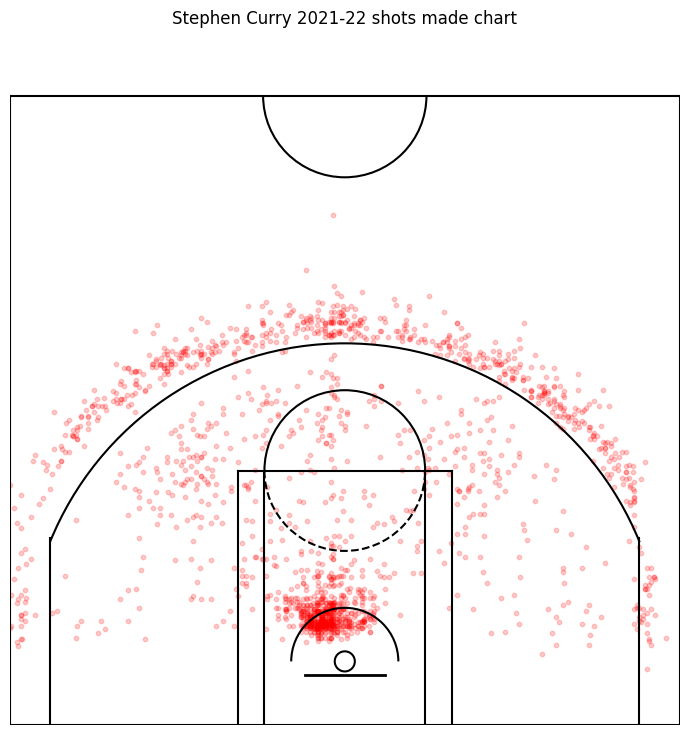

In [77]:
# Example visualization
curry_2015 = nba_shot_data[nba_shot_data['player'] == 'James Harden']
curry_2015 = curry_2015[(curry_2015['season'] == '2014-15')]
fig, ax = plt.subplots(figsize=(9, 9))
ax.scatter(
    x=(curry_2015['shotX'] * 10) - 250,
    y=curry_2015['shotY'] * (422.5 / 47.5),
    alpha=0.2,
    s=10,
    color='red'
)
draw_nba_court(ax) 
# kde = sns.kdeplot(
#     x = (curry_2015['shotX'] * 10) - 250, # adjust for coordinates of plot
#     y = curry_2015['shotY'] * (422.5 / 47.5), # adjust for coordinates of plot
#     fill = True,
#     cmap = 'plasma',
#     bw_adjust = 0.8,
#     alpha = 0.6,
#     levels = 100, 
#     thresh = 0.05,
#     ax = ax,
# )
plt.title("Stephen Curry 2021-22 shots made chart")
plt.show()

In [ ]:
# Insertion into player table
players = nba_shot_data['player'].unique().tolist()
count = 0
player_dict = {}
print("INSERT INTO player(playerID, playerName) \n VALUES")
for player in players:
    playerID = count
    playerName = player
    player_dict[playerName] = playerID
    print(f'({playerID}, "{playerName}"),')
    count += 1

In [ ]:
# Insertion into team table
teams = nba_shot_data['team'].unique().tolist()
count = 0
team_dict = {}
print("INSERT INTO team(teamID, teamName) \n VALUES")
for team in teams:
    teamID = count
    teamName = team
    team_dict[teamName] = teamID
    print(f'({teamID}, "{teamName}"),')
    count += 1

In [ ]:
# Insertion into shots table
print("INSERT INTO shots(shotID, playerID, teamID, shotX, shotY, shotType, made, homeTeam) \n VALUES")
count = 4423490
for index, row in nba_shot_data[nba_shot_data['season'] == '2021-22'].iterrows():
    shotID = count
    playerID = player_dict[row['player']]
    teamID = team_dict[row['team']]
    shotX = row['shotX']
    shotY = row['shotY']
    shotType = row['shot_type']
    made = row['made']
    homeTeam = row['home_team']
    print(f'({shotID}, {playerID}, {teamID}, {shotX}, {shotY}, {shotType}, {made}, {homeTeam}),')
    count += 1

In [ ]:
# Insertion into time table
print("INSERT INTO time(shotID, season, year, month, time, quarter) \n VALUES")
count = 4423490
for index, row in nba_shot_data[nba_shot_data['season'] == '2021-22'].iterrows():
    shotid = count
    season = row['season']
    year = row['year']
    month = int(row['month'])
    time = row['time_remaining']
    quarter = row['quarter']
    print(f'({shotid}, "{season}", {year}, {month}, "{time}", "{quarter}"),')
    count += 1
print(count)